In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import re
import emoji
from collections import Counter



In [4]:
data_predict_path = {
    'json': r"F:\Năm 3 - HK1\data-science-competition\data\Data_test_public\vimmsd-public-test.json",
    'images': r"F:\Năm 3 - HK1\data-science-competition\data\Data_test_public\public-test-images\dev-images"
}

data_path = {
    'json': r'F:\Năm 3 - HK1\data-science-competition\data\Data_train\vimmsd-train.json',
    'images': r'F:\Năm 3 - HK1\data-science-competition\data\Data_train\training-images\train-images'
}

In [5]:
def load_data(path):
    with open(path, 'r', encoding='utf-8') as f:
        f = json.load(f)
    data = pd.DataFrame.from_dict(f, orient='index')
    return data


In [6]:
df = load_data(data_path['json'])
df

,image,caption,label
0,8ae451edcd8ebf697f8763ece249115813149c55733bf8...,Cô ấy trên mạng vs cô ấy ngoài đời =))),multi-sarcasm
1,35370ffd6c791d6f8c4ab3dd4363ed468fab41e4824ee9...,Người tâm linh giao tiếp với người thực tế :))),not-sarcasm
2,316fdd1477725b9fb1a55015ac06b68b92b50bd4303e08...,Hình như Trăng hôm nay đẹp quá mọi người ạ! 😃 ...,multi-sarcasm
3,8a0f34e0e30e4e5cfb306933c1d25fa801a5da78646b59...,MỌI NGƯỜI NGHĨ SAO VỀ PHÁT BIỂU CỦA SHARK VIỆT...,not-sarcasm
4,e517a5e95d1065886a7c815e82fe254381d4f9f4b244d4...,2 tay hai nàng chứ việc gì phải lệ hai hàng,multi-sarcasm
...,...,...,...
10800,46ce5ad52085691fc81869c82e8222c0d737b34fedc2bd...,Lộn đầu rồi,not-sarcasm
10801,f816f7152cca9c5899f818ce681cf0949c6964ea2fc5ae...,"Chào các bạn, mình là Goda Takeshi. Trong live...",not-sarcasm
10802,0accae8d37f9edc90b5f0a2f5f3cca773f5d01b5124302...,Cre: Hùynh Quốc Huy,not-sarcasm
10803,bf125e295f85c0946940b789b2ba10106b2a85b9e70d88...,Anh hùng thật sự,not-sarcasm


In [54]:
import pandas as pd

# Giả sử df là DataFrame ban đầu với các cột 'caption' và 'label'
# Lọc các giá trị trùng lặp trong cột 'caption'
duplicates = df[df.duplicated(subset=['caption'], keep=False)]

# Đếm số lần xuất hiện cho từng loại label trên các giá trị 'caption' bị trùng
result = (
    duplicates.groupby(['caption', 'label'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
    .rename_axis(None, axis=1)
)

# Đổi tên các cột để dễ hiểu hơn
result.columns = ['caption', 'not-sarcasm', 'text-sarcasm', 'image-sarcasm', 'multi-sarcasm']


In [6]:
result

,caption,not-sarcasm,text-sarcasm,image-sarcasm,multi-sarcasm
0,"""BƠI ĐÊM"" CÓ NGÀY GẶP ...?\nGia đình Waller gồ...",0,0,4,0
1,"""Lấy Mẻ bôi kín những chỗ bám bẩn xong để qua ...",0,0,2,0
2,"""MẠNG XÃ HỘI ZING ME CHÍNH THỨC RA MẮT GIỚI TR...",0,0,5,0
3,"""Những tổn thương ấy vẫn luôn ở đây, chẳng qua...",0,0,4,0
4,"""Tý về ông già chửi tau chớt luôn á"" - Con giờ...",0,0,4,0
...,...,...,...,...,...
692,🥕🥕RA MẮT ÁO THUN STREET STYLE THỎ BẢY MÀU SS1🥕...,0,0,5,0
693,🥰,2,0,1,0
694,🥰🥰😍😍🥰🥰😍😌😍🥰🥰🥲🙂😚,0,0,5,0
695,🥲,0,2,0,0


In [7]:
encoded_label = {
    'not-sarcasm': 0,
    'image-sarcasm': 1,
    'text-sarcasm': 2,
    'multi-sarcasm': 3,
}
labels = ['multi-sarcasm', 'not-sarcasm', 'image-sarcasm', 'text-sarcasm']

df['encoded_label'] = df['label'].apply(lambda x: encoded_label[x])


In [8]:
df['label'].value_counts()

label
not-sarcasm      6062
multi-sarcasm    4224
image-sarcasm     442
text-sarcasm       77
Name: count, dtype: int64

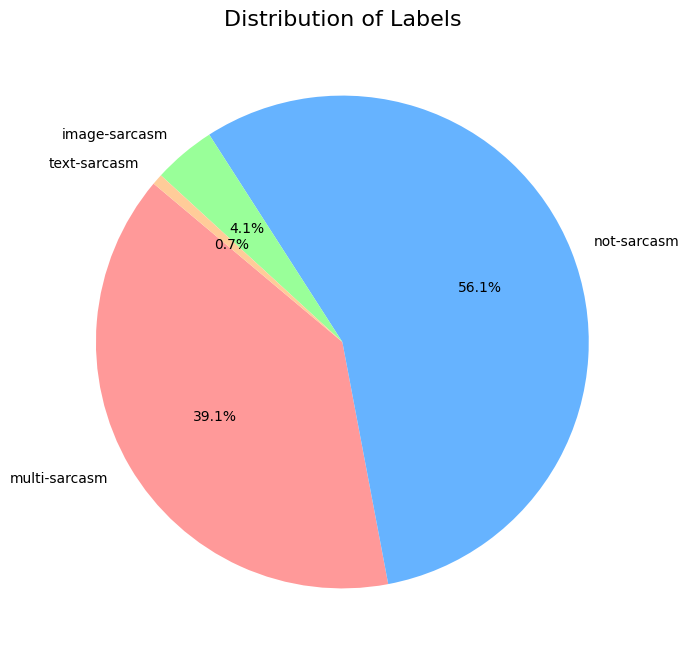

In [10]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    [df['label'].value_counts().get(label, 0) for label in labels],  # Số lượng từng label
    labels=labels,  # Tên từng label
    autopct='%1.1f%%',  # Hiển thị phần trăm
    startangle=140,  # Góc bắt đầu
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Màu sắc tùy chỉnh
)

plt.title("Distribution of Labels", fontsize=16)
plt.show()

In [10]:
df.describe()

,encoded_label
count,10805.00000
mean,1.22795
std,1.44226
min,0.00000
25%,0.00000
50%,0.00000
75%,3.00000
max,3.00000


# phân tích emoji

In [11]:
df.head()

,image,caption,label,encoded_label
0,8ae451edcd8ebf697f8763ece249115813149c55733bf8...,Cô ấy trên mạng vs cô ấy ngoài đời =))),multi-sarcasm,3
1,35370ffd6c791d6f8c4ab3dd4363ed468fab41e4824ee9...,Người tâm linh giao tiếp với người thực tế :))),not-sarcasm,0
2,316fdd1477725b9fb1a55015ac06b68b92b50bd4303e08...,Hình như Trăng hôm nay đẹp quá mọi người ạ! 😃 ...,multi-sarcasm,3
3,8a0f34e0e30e4e5cfb306933c1d25fa801a5da78646b59...,MỌI NGƯỜI NGHĨ SAO VỀ PHÁT BIỂU CỦA SHARK VIỆT...,not-sarcasm,0
4,e517a5e95d1065886a7c815e82fe254381d4f9f4b244d4...,2 tay hai nàng chứ việc gì phải lệ hai hàng,multi-sarcasm,3


In [27]:
import emoji

# Tạo DataFrame để lưu trữ kết quả
df_emoji = pd.DataFrame(columns=['emoji'])


# Hàm để tìm emoji trong một chuỗi
def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]


labels = ['multi-sarcasm', 'not-sarcasm', 'text-sarcasm', 'image-sarcasm']
# Đếm số lần xuất hiện của mỗi emoji trong từng lớp
for label in labels:
    # Lọc DataFrame theo label
    filtered_df = df[df['label'] == label]

    # Tìm tất cả các emoji trong cột và tách ra thành từng hàng
    all_emojis = filtered_df['caption'].apply(extract_emojis).explode()

    # Đếm số lần xuất hiện của từng emoji
    emoji_counts = all_emojis.value_counts().reset_index()
    emoji_counts.columns = ['emoji', label]
    df_emoji = df_emoji.merge(emoji_counts, on='emoji', how='outer')

df_emoji = df_emoji.fillna(0)

In [28]:
df_emoji

,emoji,multi-sarcasm,not-sarcasm,text-sarcasm,image-sarcasm
0,©,3.0,7.0,0.0,0.0
1,‼,3.0,46.0,0.0,1.0
2,⁉,1.0,5.0,0.0,0.0
3,↕,1.0,0.0,0.0,0.0
4,⏰,2.0,23.0,0.0,0.0
...,...,...,...,...,...
511,🫦,1.0,0.0,0.0,0.0
512,🫨,0.0,5.0,0.0,0.0
513,🫰,5.0,33.0,0.0,0.0
514,🫵,1.0,16.0,0.0,1.0


In [25]:
df_emoji['multi_rate'] = df_emoji['multi-sarcasm'].apply(lambda x : x * 4224/10805)
df_emoji['not_rate'] = df_emoji['not-sarcasm'].apply(lambda x : x * 6062/10805)
df_emoji['image_rate'] = df_emoji['image-sarcasm'].apply(lambda x : x * 442/10805)
df_emoji['text_rate'] = df_emoji['text-sarcasm'].apply(lambda x : x * 77/10805)


In [29]:
df_emoji.head(10)

,emoji,multi-sarcasm,not-sarcasm,text-sarcasm,image-sarcasm
0,©,3.0,7.0,0.0,0.0
1,‼,3.0,46.0,0.0,1.0
2,⁉,1.0,5.0,0.0,0.0
3,↕,1.0,0.0,0.0,0.0
4,⏰,2.0,23.0,0.0,0.0
5,⏱,0.0,5.0,0.0,0.0
6,⏲,0.0,1.0,0.0,0.0
7,⏳,0.0,1.0,0.0,0.0
8,▪,0.0,3.0,0.0,0.0
9,▶,0.0,3.0,0.0,0.0


sự phân phối của emoji không đồng đều có thể dẫn đến mô hình sẽ dựa vào emoji để dự đoán mà không xét tới dấu hiệu đa phương thức </br>
**Đề xuất:** Dữ lại emoji

# Phân tích hashtag

In [35]:
df_hashtags = pd.DataFrame(columns=['hashtag'])


def extract_hashtags(text):
    hashtag = re.findall(r'#\w+', text)
    return hashtag


for label in labels:
    # Lọc DataFrame theo label
    filtered_df = df[df['label'] == label]

    # Tìm tất cả các emoji trong cột và tách ra thành từng hàng
    all_hashtags = filtered_df['caption'].apply(extract_hashtags).explode()

    # Đếm số lần xuất hiện của từng emoji
    hashtag_counts = all_hashtags.value_counts().reset_index()
    hashtag_counts.columns = ['hashtag', label]
    df_hashtags = df_hashtags.merge(hashtag_counts, on='hashtag', how='outer')

df_hashtags = df_hashtags.fillna(0)

In [32]:
df_hashtags['multi_rate'] = df_hashtags['multi-sarcasm'].apply(lambda x : x * 4224/10805)
df_hashtags['not_rate'] = df_hashtags['not-sarcasm'].apply(lambda x : x * 6062/10805)
df_hashtags['image_rate'] = df_hashtags['image-sarcasm'].apply(lambda x : x * 442/10805)
df_hashtags['text_rate'] = df_hashtags['text-sarcasm'].apply(lambda x : x * 77/10805)


In [36]:
df_hashtags.head(10)

,hashtag,multi-sarcasm,not-sarcasm,text-sarcasm,image-sarcasm
0,#0,1.0,0.0,0.0,0.0
1,#098,0.0,1.0,0.0,0.0
2,#1,1.0,16.0,0.0,0.0
3,#10,0.0,0.0,0.0,1.0
4,#100,0.0,1.0,0.0,0.0
5,#1111SieuSaleLivestreamKhungNhatNam,0.0,9.0,0.0,0.0
6,#1111ThuThapVoucher1TR5,0.0,1.0,0.0,0.0
7,#11thGen,0.0,1.0,0.0,0.0
8,#1212ShopeeLiveSaleSinhNhat,0.0,2.0,0.0,0.0
9,#1212ThuThapVoucher1TR2,0.0,1.0,0.0,0.0


In [18]:
df_hashtags.describe()

,multi-sarcasm,not-sarcasm,text-sarcasm,image-sarcasm,multi_rate,not_rate,image_rate,text_rate
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,1.000640,1.796415,0.028169,0.206786,0.391180,1.007854,0.008459,0.000201
std,9.389398,5.772722,0.278139,1.747004,3.670599,3.238708,0.071465,0.001982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.561037,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.390930,0.561037,0.000000,0.000000
max,296.000000,149.000000,5.000000,41.000000,115.715317,83.594447,1.677186,0.035632


In [19]:
sum(x for x in df_hashtags['multi-sarcasm'])

1563.0

In [20]:
sum(x for x in df_hashtags['not-sarcasm'])

2806.0

In [21]:
sum(x for x in df_hashtags['text-sarcasm'])

44.0

In [22]:
sum(x for x in df_hashtags['image-sarcasm'])

323.0

# Remove Emoji and Hashtag


In [ ]:
import re
import emoji

def remove_hashtags_and_emojis(input_file, output_file):
    """
    Hàm để loại bỏ hashtag, emoji, URL và chuẩn hóa văn bản trong caption từ file JSON.

    Parameters:
    - input_file: đường dẫn đến file JSON đầu vào.
    - output_file: đường dẫn đến file JSON đầu ra.
    """
    
    # Đọc file JSON
    with open(input_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Hàm để loại bỏ hashtag, emoji, URL và chuẩn hóa văn bản
    def clean_caption(caption):
        # Chuyển đổi caption sang chữ thường
        caption = caption.lower()


        # Loại bỏ hashtag
        caption = re.sub(r'#\S+', '', caption)  # Loại bỏ hashtag và các từ liền theo sau

        # Loại bỏ URL
        caption = re.sub(r'http\S+|www\S+', '', caption)  # Loại bỏ URL

        # # Chuyển đổi emoji thành dạng văn bản
        caption = emoji.demojize(caption)
        
        # Loại bỏ \n và các ký tự không cần thiết
        caption = caption.replace('\n', '')
        caption = re.sub(r'[.,\\,:,=,]', '', caption)
        
        return caption.strip()  

    # Cập nhật caption trong dữ liệu
    for key, entry in data.items():
        entry['caption'] = clean_caption(entry['caption'])

    # Ghi dữ liệu đã cập nhật vào file JSON mới
    with open(output_file, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)
